<a href="https://colab.research.google.com/github/SoheilBadri2000/DataScience2/blob/main/08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PCA

## PCA Manual Setup

In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import seaborn as sns

# singular value decomposition in linear algebra
from numpy.linalg import svd

from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")

In [2]:
def Manual_PCA(X, k=2):
  m = X.shape[0]

  X_norm = X - X.mean(axis=0) # STEP 1: zero-center data (remove mean)
  Sigma = (X_norm.T @ X_norm) / m # STEP 2: compute covariance matrix
  U, S, VT = svd(Sigma) # STEP 3: Singular Value Decomposition

  X_proj = X_norm @ U[:, :k] # project data
  V = np.transpose(VT)
  return X_proj, U, S, V

In [3]:
X = np.array([[2, -1, 1, 0, 2],
              [2, 2, 2, 2, 1],
              [1, 1, 1, 0, 1],
              [5, 5, 5, 2, 0],
              [1, 1, 0, 2, 2],
              [0, 0, 0, 3, 3],
              [0, -1, 0, -1, 1]], dtype=np.float32)
print(X)

[[ 2. -1.  1.  0.  2.]
 [ 2.  2.  2.  2.  1.]
 [ 1.  1.  1.  0.  1.]
 [ 5.  5.  5.  2.  0.]
 [ 1.  1.  0.  2.  2.]
 [ 0.  0.  0.  3.  3.]
 [ 0. -1.  0. -1.  1.]]


In [4]:
X_proj, _, _, _ = Manual_PCA(X, k=2)
print(X_proj)

[[ 1.4970986   1.1862993 ]
 [-1.458537   -0.56314224]
 [ 0.5487078   0.9959462 ]
 [-6.6480775   0.33380988]
 [ 0.95121646 -1.303748  ]
 [ 2.1081123  -2.5341668 ]
 [ 3.001479    1.8850021 ]]


In [5]:
A = np.array([[90, 60, 90],
              [90, 90, 30],
              [60, 60, 60],
              [60, 60, 90],
              [30, 30, 30]], dtype=np.float32)
print(A)

[[90. 60. 90.]
 [90. 90. 30.]
 [60. 60. 60.]
 [60. 60. 90.]
 [30. 30. 30.]]


In [6]:
u, s, vt = svd(A.T @ A)
print("U =", u)
print("\nS =", s)

U = [[-0.61877745 -0.31692725 -0.71879876]
 [-0.5517488  -0.4759884   0.6848418 ]
 [-0.55918485  0.820361    0.11966664]]

S = [62266.645    3159.1123    274.24503]


In [7]:
np.linalg.eig(A.T @ A)

(array([62266.645  ,   274.24503,  3159.1123 ], dtype=float32),
 array([[-0.61877745, -0.71879876, -0.31692725],
        [-0.5517488 ,  0.6848418 , -0.4759884 ],
        [-0.55918485,  0.11966664,  0.820361  ]], dtype=float32))

# PCA in packages

## Country selection for (HELP Internatioonal)

In [8]:
# Plotting setup
plt.rcParams["figure.figsize"] = [8, 4]
plt.rcParams["figure.dpi"] = 150
plt.style.use("Solarize_Light2")

In [9]:
!gdown --id 1Z5mNn6qOAYsndSYLU802tU6ybi_Rovym

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Z5mNn6qOAYsndSYLU802tU6ybi_Rovym
To: /content/Country-data.csv
100% 9.23k/9.23k [00:00<00:00, 20.0MB/s]


In [10]:
df = pd.read_csv("Country-data.csv", sep=",")
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [11]:
df.shape

(167, 10)

In [12]:
df.dtypes.value_counts()

float64    7
int64      2
object     1
dtype: int64

In [13]:
df_new = df.drop(columns="country")

for column in df_new:
  df_new[column] = df_new[column].astype(np.float32)

In [14]:
df_new.dtypes.value_counts()

float32    9
dtype: int64

In [15]:
df_new.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.199997,10.000000,7.58,44.900002,1610.0,9.44,56.200001,5.82,553.0
1,16.600000,28.000000,6.55,48.599998,9930.0,4.49,76.300003,1.65,4090.0
2,27.299999,38.400002,4.17,31.400000,12900.0,16.10,76.500000,2.89,4460.0
3,119.000000,62.299999,2.85,42.900002,5900.0,22.40,60.099998,6.16,3530.0
4,10.300000,45.500000,6.03,58.900002,19100.0,1.44,76.800003,2.13,12200.0


In [16]:
df_new.isnull().sum()

child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

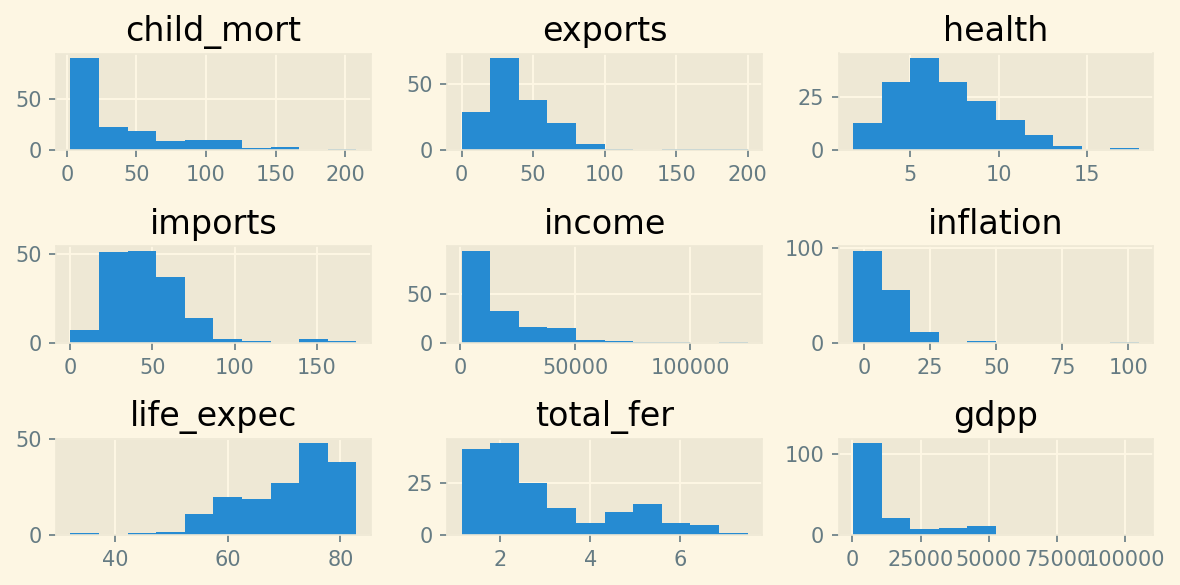

In [17]:
df_new.hist()
plt.tight_layout()

## Transforming Skewed Features

In [18]:
skew_limit = 0.75 # define a limit above which we will log transform
skew_vals = df_new[df_new.columns].skew()

# Showing the skewed columns
skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:"Skew"})
             .query("abs(Skew) > {}".format(skew_limit)))

skew_cols

,Skew
inflation,5.154049
exports,2.445824
income,2.231480
gdpp,2.218051
imports,1.905276
child_mort,1.450774
total_fer,0.967092
life_expec,-0.970996


In [19]:
# Perform the skew transformation:
for col in skew_cols.index.values:
  df_new[col] = df_new[col].apply(np.log1p)

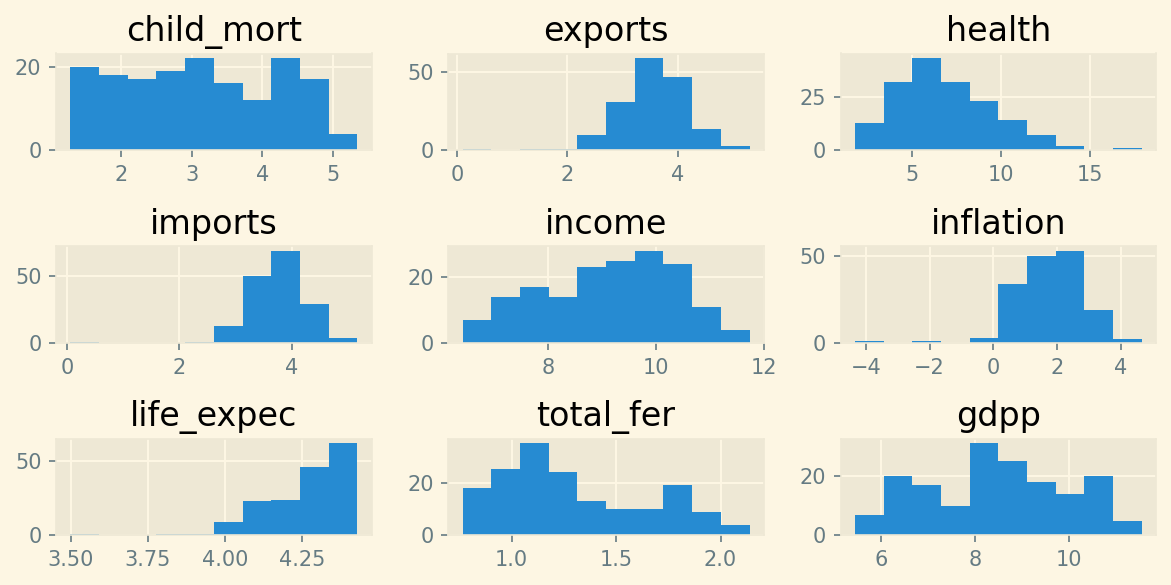

In [20]:
df_new.hist()
plt.tight_layout()

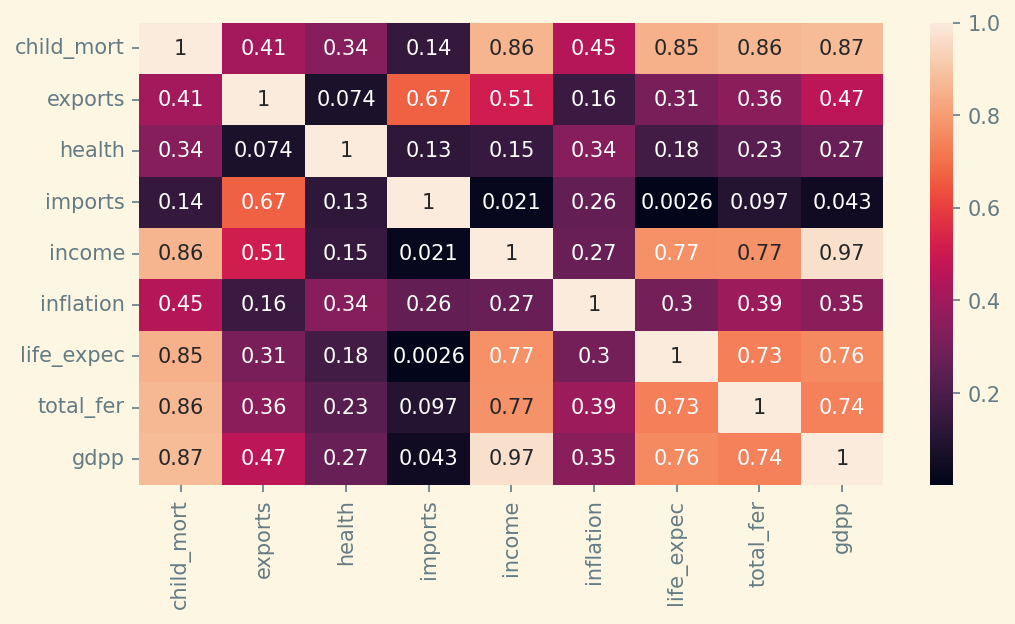

In [21]:
corr_mat = df_new.corr()
sns.heatmap(corr_mat.abs(), annot=True);

In [22]:
corr_mat.abs().idxmax()

child_mort    child_mort
exports          exports
health            health
imports          imports
income            income
inflation      inflation
life_expec    life_expec
total_fer      total_fer
gdpp                gdpp
dtype: object

In [23]:
# Strip out the diagonal values for the next step
for x in range(len(df_new.columns)):
  corr_mat.iloc[x,x] = 0.0

In [24]:
# scaling
mms = MinMaxScaler()

for col in df_new.columns:
  df_new[col] = mms.fit_transform(df_new[[col]]).squeeze()

In [25]:
df_new.describe().T

,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,0.454720,0.267697,0.0,0.232179,0.425884,0.705123,1.0
exports,167.0,0.663427,0.126307,0.0,0.597592,0.669262,0.741271,1.0
health,167.0,0.311106,0.170717,0.0,0.193288,0.280298,0.422001,1.0
imports,167.0,0.722024,0.105885,0.0,0.661949,0.730678,0.789330,1.0
income,167.0,0.507677,0.230849,0.0,0.320338,0.524737,0.680321,1.0
inflation,163.0,0.677629,0.116671,0.0,0.603311,0.689902,0.758904,1.0
life_expec,167.0,0.820643,0.146971,0.0,0.747828,0.867567,0.920022,1.0
total_fer,167.0,0.394844,0.257675,0.0,0.191029,0.335836,0.596801,1.0
gdpp,167.0,0.499336,0.245200,0.0,0.285665,0.490638,0.670965,1.0


In [26]:
df_new.isnull().sum()

child_mort    0
exports       0
health        0
imports       0
income        0
inflation     4
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [27]:
df_new[df_new["inflation"].isnull()]

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
43,0.049409,0.788722,0.377253,0.802495,0.720922,NaN,0.929665,0.112722,0.727189
73,0.090541,0.873282,0.458670,0.864115,0.810957,NaN,0.968718,0.254601,0.874363
77,0.037955,0.513309,0.477315,0.513080,0.765088,NaN,1.000000,0.077052,0.859614
131,0.357865,0.855470,0.098819,0.907187,0.659427,NaN,0.871916,0.282698,0.628073


In [28]:
df_new.fillna(0, inplace=True)
df_new.isnull().sum()

child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [29]:
X = np.array(df_new)

In [30]:
pca = PCA()

In [31]:
pca.fit(X)

PCA()

In [32]:
print(pca.singular_values_)

[6.4166713  2.3093657  1.9185679  1.8499223  1.6089057  1.1974955
 0.7739069  0.56919044 0.34636554]


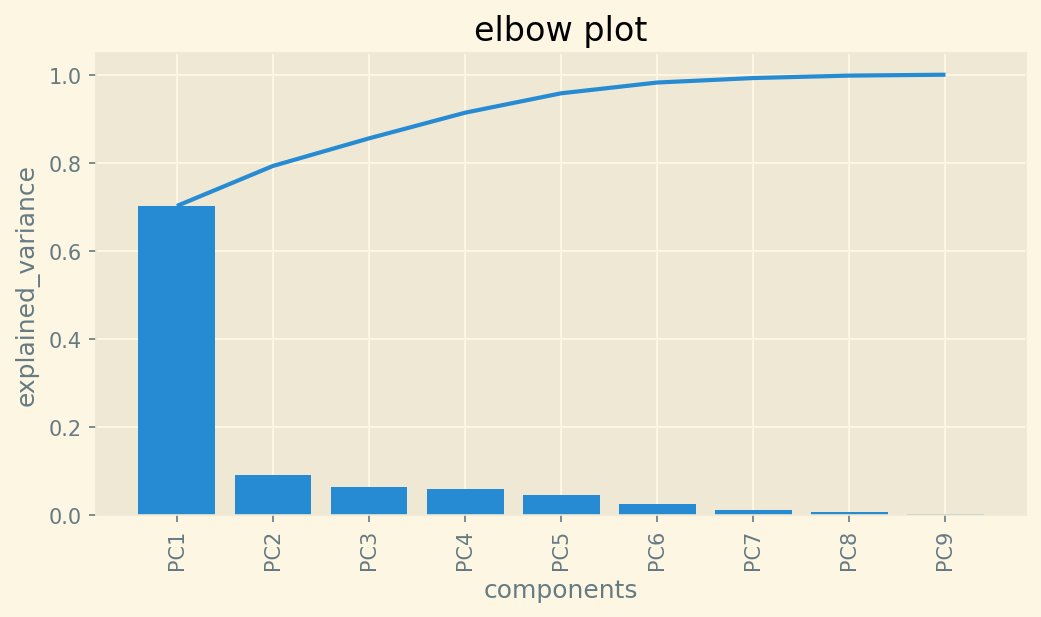

In [33]:
PC_list = ["PC"+str(i+1) for i in range(9)]
plt.bar(PC_list, pca.explained_variance_ratio_)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title("elbow plot")
plt.xlabel("components")
plt.ylabel("explained_variance")
plt.xticks(rotation=90)
plt.show()

In [34]:
print("Explained var with first PC:", np.round(np.cumsum(pca.explained_variance_ratio_)[0]*100, 2))
print("Explained var with first 2 PC:", np.round(np.cumsum(pca.explained_variance_ratio_)[1]*100, 2))
print("Explained var with first 3 PC:", np.round(np.cumsum(pca.explained_variance_ratio_)[2]*100, 2))
print("Explained var with first 4 PC:", np.round(np.cumsum(pca.explained_variance_ratio_)[3]*100, 2))
print("Explained var with first 5 PC:", np.round(np.cumsum(pca.explained_variance_ratio_)[4]*100, 2))

Explained var with first PC: 70.17
Explained var with first 2 PC: 79.26
Explained var with first 3 PC: 85.53
Explained var with first 4 PC: 91.37
Explained var with first 5 PC: 95.78


In [35]:
total_var = np.cumsum(pca.explained_variance_ratio_) * 100
for i in range(9):
  print("PC {:2d}, explained var: {:.2f}".format(i+1, total_var[i]))

PC  1, explained var: 70.17
PC  2, explained var: 79.26
PC  3, explained var: 85.53
PC  4, explained var: 91.37
PC  5, explained var: 95.78
PC  6, explained var: 98.22
PC  7, explained var: 99.24
PC  8, explained var: 99.80
PC  9, explained var: 100.00


Text(0, 0.5, 'inflation')

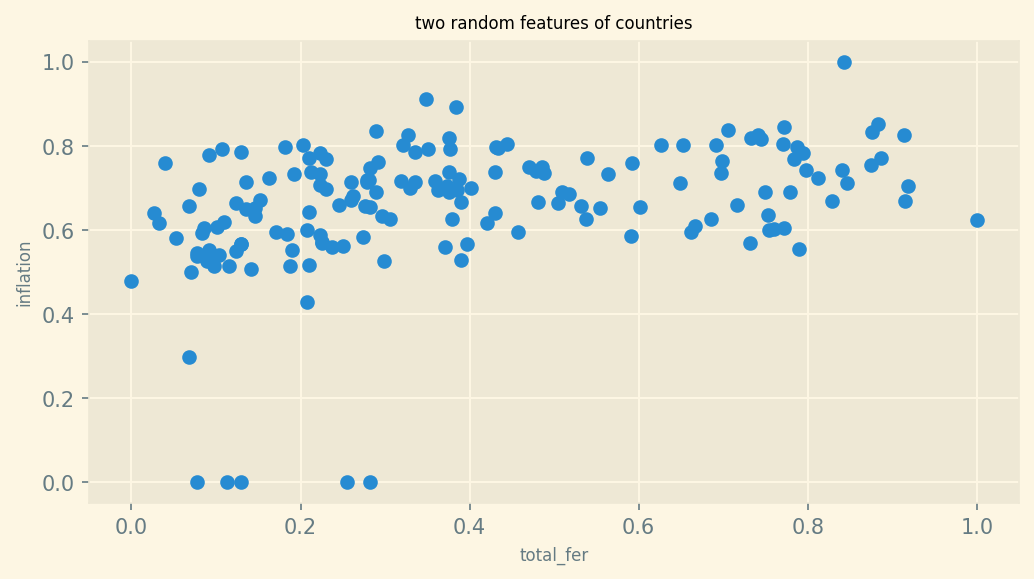

In [36]:
plt.scatter(X[:, 7], X[:, 5])
plt.title("two random features of countries", fontsize=8)
plt.xlabel("total_fer", fontsize=8)
plt.ylabel("inflation", fontsize=8)

Text(0.5, 0.5, 'inflation')

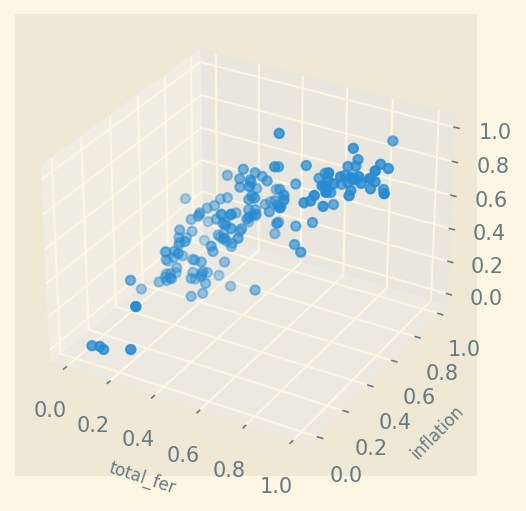

In [38]:
ax1 = plt.axes(projection="3d")
ax1.scatter3D(X[:, 7], X[:, 5], X[:, 0])
plt.xlabel("total_fer", fontsize=8)
plt.ylabel("inflation", fontsize=8)

In [39]:
pca_2 = PCA(n_components=2, random_state=0)

In [40]:
pca_2.fit(X)

PCA(n_components=2, random_state=0)

In [41]:
pca_2.components_

array([[ 0.520621  , -0.11942929, -0.10347936, -0.02486145, -0.4365957 ,
         0.13889883, -0.24950874,  0.46431842, -0.4643377 ],
       [-0.13637747, -0.20873454,  0.81319463,  0.08925492, -0.2989872 ,
        -0.39430156, -0.0536228 , -0.04418771, -0.13741948]],
      dtype=float32)

In [42]:
print((pca_2.explained_variance_ratio_))

[0.7017194  0.09089276]


In [43]:
print(np.round(pca_2.explained_variance_ratio_ * 100, 2))

[70.17  9.09]


In [44]:
print(pca_2.singular_values_)

[6.4166713 2.3093657]


In [45]:
X_2PC = pca_2.transform(X)

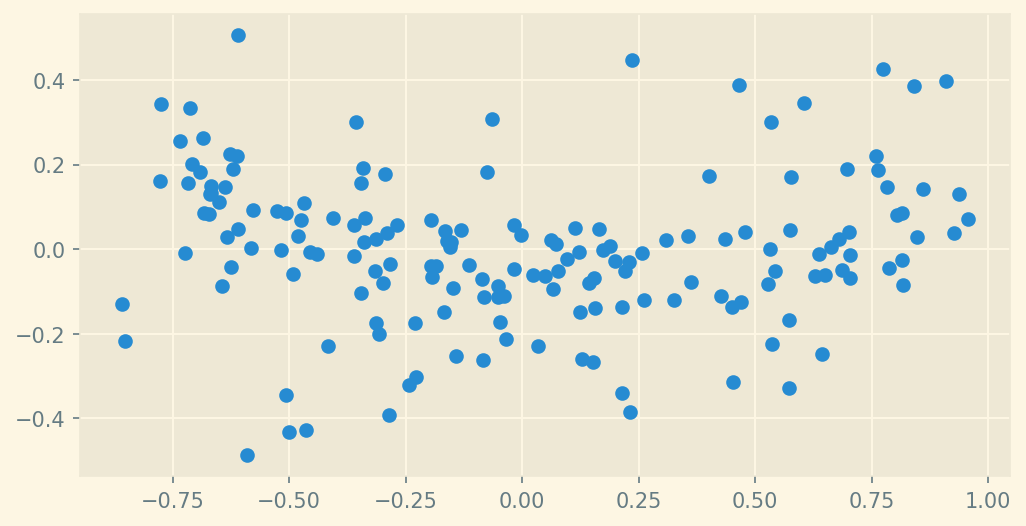

In [47]:
plt.scatter(X_2PC[:, 0], X_2PC[:, 1])

In [48]:
pca_3 = PCA(n_components=3, random_state=0)

In [49]:
pca_3.fit(X)

PCA(n_components=3, random_state=0)

In [50]:
print(pca_3.explained_variance_ratio_)

[0.7017194  0.09089276 0.06273331]


In [51]:
print(np.round(pca_3.explained_variance_ratio_ * 100, 2))

[70.17  9.09  6.27]


In [52]:
print(pca_3.singular_values_)

[6.4166713 2.3093657 1.9185679]


In [53]:
X_3PC = pca_3.transform(X)

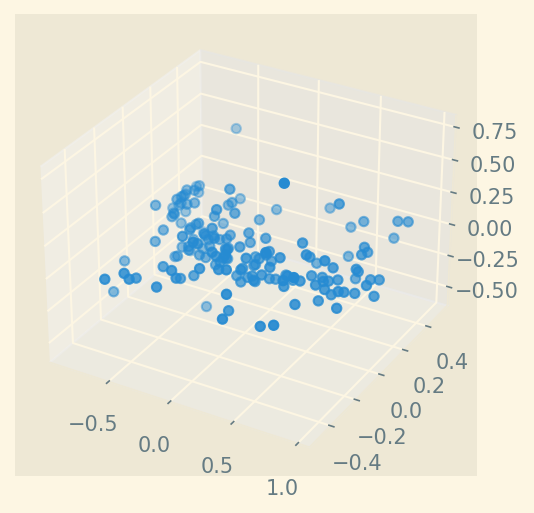

In [54]:
ax = plt.axes(projection="3d")
ax.scatter3D(X_3PC[:, 0], X_3PC[:, 1], X_3PC[:, 2])

# Hand-Written Digits (Small Size)

In [56]:
from sklearn.datasets import load_digits
digits = load_digits()
data = digits.data
label = digits.target
data.shape

(1797, 64)

In [57]:
set(label)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

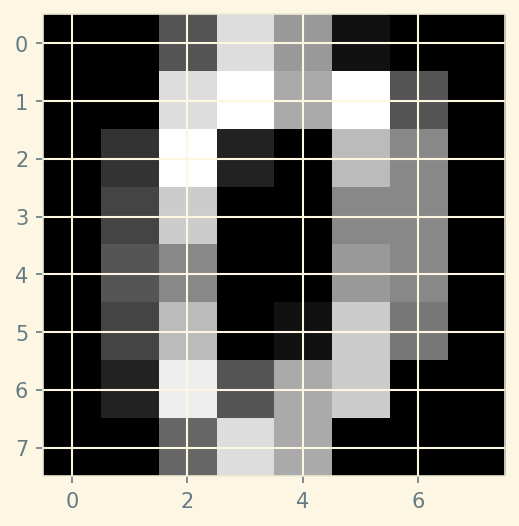

In [58]:
image_sample = data[0, :].reshape(8, 8)
plt.imshow(image_sample, cmap="gray")

In [59]:
pca_digits = PCA()
pca_digits2 = PCA(2) # we need 2 principal components.
PC_dig1 = pca_digits.fit_transform(data)
PC_dig2 = pca_digits2.fit_transform(data)

print(PC_dig1.shape)
print(PC_dig2.shape)

(1797, 64)
(1797, 2)


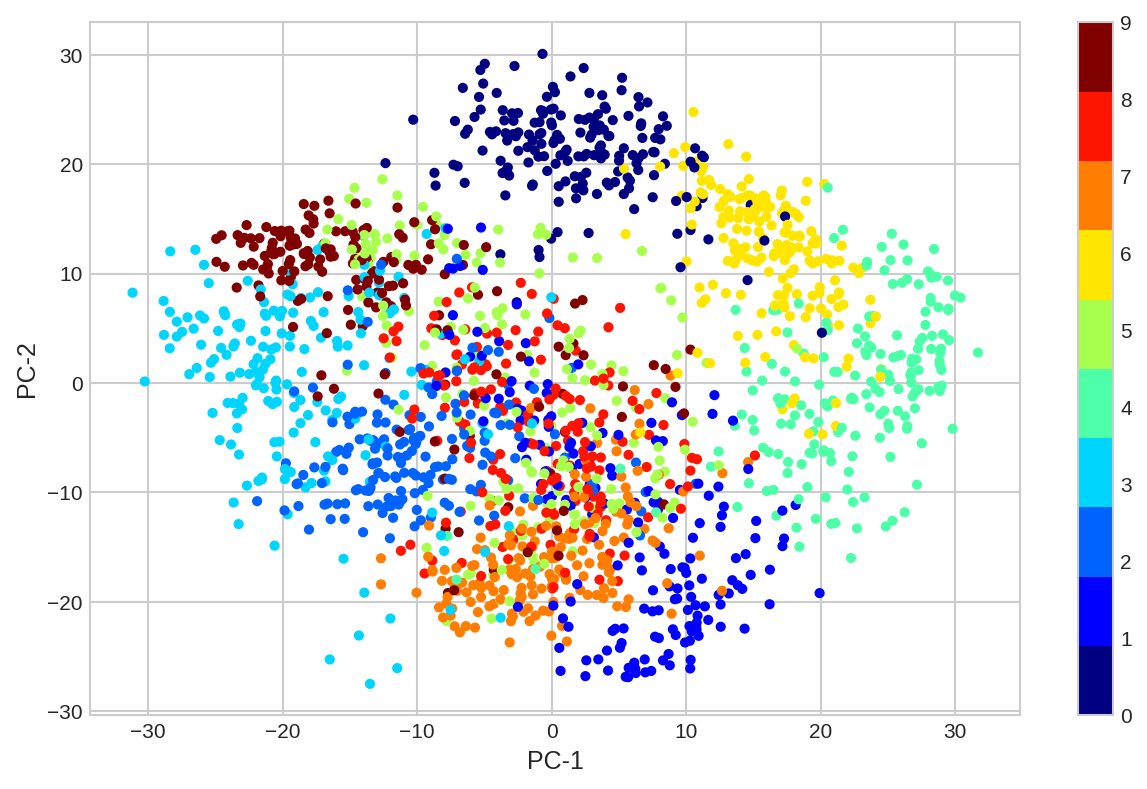

In [61]:
plt.style.use("seaborn-whitegrid")
plt.figure(figsize=(10,6))
c_map = plt.cm.get_cmap("jet", 10)
plt.scatter(PC_dig2[:, 0], PC_dig2[:, 1], s=15, cmap=c_map, c=digits.target)
plt.colorbar()
plt.xlabel("PC-1"), plt.ylabel("PC-2")
plt.show()

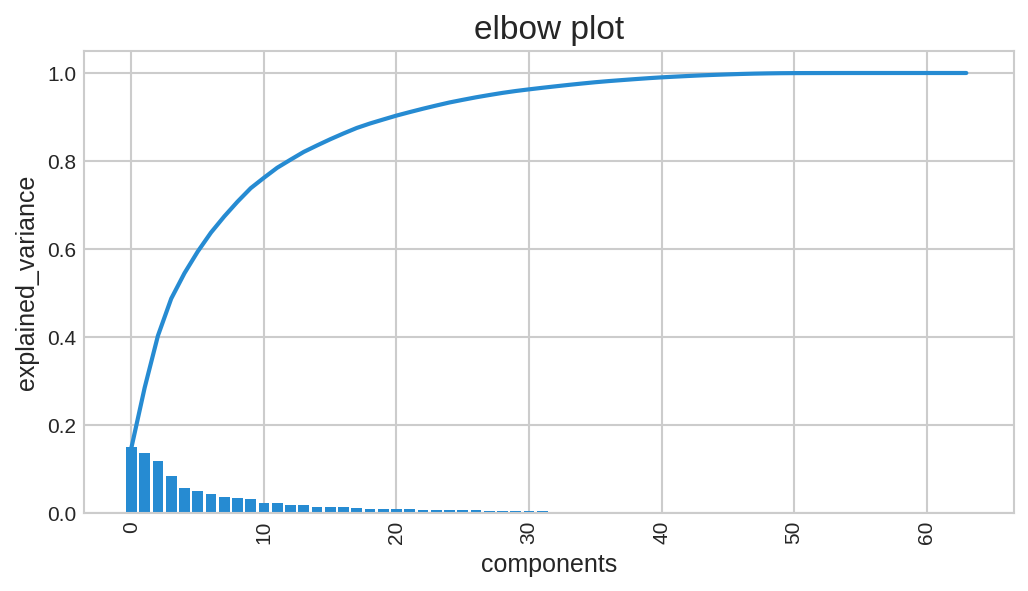

In [62]:
plt.bar(np.arange(64), pca_digits.explained_variance_ratio_)
plt.plot(np.cumsum(pca_digits.explained_variance_ratio_))
plt.title("elbow plot")
plt.xlabel("components")
plt.ylabel("explained_variance")
plt.xticks(rotation=90)
plt.show()

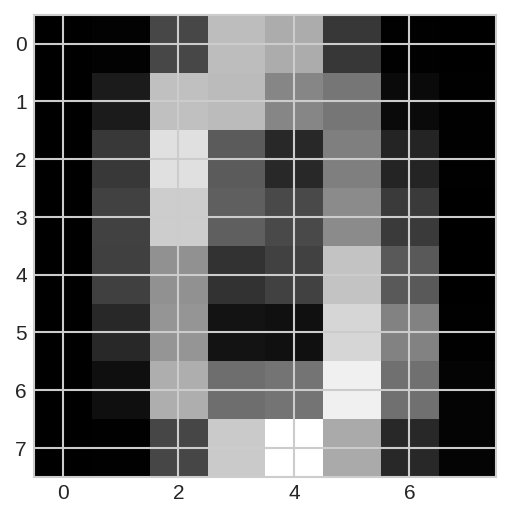

In [63]:
im = pca_digits2.inverse_transform(PC_dig2)
image_sample = im[0, :].reshape(8, 8)
plt.imshow(image_sample, cmap="gray")